# PISA 2012 Dataset Exploration 

## by Abdelhamid Tebba


PISA, the OECD Programme for International Student Assessment, is a survey that takes place every 3 years with the aim to see how well are the skills and knowledge of 15-16 year orld students in reading, mathematics and science. 

The database of this assessment includes not only the results of the assessments but also plenty of information  regarding the family background, the school programs, the attitudes and behaviors toward school and toward the subjetcs assessed, the student-teacher relation, etc.

In the 2012 edition of PISA, 485,490 students from 68 countries participated in the survey. 


## Table of contents:
<ol>
<li><a href="#wrang">Preliminary wrangling</a></li>   
<li><a href="#exp">Exploration overview</a></li> 
<li><a href="#uni">Univariate Exploration</a></li> 
<li><a href="#bi">Bivariate Exploration</a></li> 
<li><a href="#mu">Multivariate Exploration</a></li> 
</ol>

In [1]:
# Import all packages and set plots to be embedded inline:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Loading the dataset:
import zipfile
z = zipfile.ZipFile(r'E:\NAND\project_5\pisa2012.zip')
pisa = pd.read_csv(z.open('pisa2012.csv'), sep=',', encoding='iso-8859-1')


C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


The PISA2012 csv file contains more than 600 variables. As my exploration will only focus on a limited number of variables (between around 20), I will create a new dataframe that contains only a subset of this data and store it in a csv file **pisa_sub.csv**. This will save a lot of time to load the intial dataset each time I want to run my cells. 

After briefly reading the PISA 2012 Technical Report, I decided to select the following 21 variables:

In [4]:
pisa_df = pisa.loc[:, ['CNT', 'OECD', 'STIDSTD', 'ST01Q01', 'ST04Q01', 'ST15Q01', 'ST19Q01', 'LMINS', 'MMINS', 'SMINS' , 'TEACHSUP', 'AGE', 'ESCS', 'HISEI', 'OUTHOURS', 'PARED', 'STUDREL', 'EC05Q01', 'PV1MATH', 'PV1READ','PV1SCIE']]

#Storing the selected variables in a new csv file:
pisa_df.to_csv('pisa_sub.csv', index=False)

***Loading the new dataframe:***

In [99]:
pisa_sub = pd.read_csv(r'E:\NAND\project_5\pisa_sub.csv')

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
pisa_sub.head(3)

,CNT,OECD,STIDSTD,ST01Q01,ST04Q01,ST15Q01,ST19Q01,LMINS,MMINS,SMINS,...,AGE,ESCS,HISEI,OUTHOURS,PARED,STUDREL,EC05Q01,PV1MATH,PV1READ,PV1SCIE
0,Albania,Non-OECD,1,10,Female,"Other (e.g. home duties, retired)",Working part-time <for pay>,NaN,NaN,NaN,...,16.17,NaN,NaN,NaN,12.0,-1.04,NaN,406.8469,249.5762,341.7009
1,Albania,Non-OECD,2,10,Female,Working full-time <for pay>,Working full-time <for pay>,315.0,270.0,90.0,...,16.17,NaN,NaN,8.0,16.0,NaN,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,3,9,Female,Working full-time <for pay>,Working full-time <for pay>,300.0,NaN,NaN,...,15.58,NaN,NaN,24.0,16.0,NaN,NaN,533.2684,401.2100,499.6643


In [101]:
pisa_sub.shape

(485490, 21)

As you may notice, the columns labels are undecipherable. These labels correspond to the variables names in the PISA2012 report. In the next section, I will rename these columns so as to make it easy for me to analyze the data and for any reader to understand the meaning of these labels. However, I will rewrite these variable names in the README file and give a full explanation of their meaning. 

I also noticed that the values of two variables (ST15Q01, ST19Q01), which correspond  respectively to mother's and father's current occupation, are inconvenient. I think it will be better to change the values to a more practical ones.

## 1. Preliminary Wrangling:<a id='wrang'></a>

***Renaming the variables:***

In [102]:
pisa_sub.rename(columns={'CNT':'Country_code', 'OECD':'oecd', 'STIDSTD':'student_id', 'ST01Q01':'grade', 'ST04Q01':'gender', 'ST15Q01':'mother_job', 'ST19Q01':'father_job', 'LMINS':'min_lang_class', 'MMINS': 'min_math_class', 'SMINS':'min_sci_class', 'TEACHSUP':'teacher_support', 'AGE':'age', 'ESCS':'eco_social_index', 'HISEI':'parent_status', 'OUTHOURS':'outside_studytime', 'PARED':'parent_education', 'STUDREL':'teacher_relation', 'EC05Q01':'lang_home'}, inplace=True)

In [103]:
pisa_sub.columns

Index(['Country_code', 'oecd', 'student_id', 'grade', 'gender', 'mother_job',
       'father_job', 'min_lang_class', 'min_math_class', 'min_sci_class',
       'teacher_support', 'age', 'eco_social_index', 'parent_status',
       'outside_studytime', 'parent_education', 'teacher_relation',
       'lang_home', 'PV1MATH', 'PV1READ', 'PV1SCIE'],
      dtype='object')

The pisa_sub columns are summerized as follows:

* **Country_code:** 3 digit country code
* **oecd:** whether a country is part of the oecd or not (oecd stands for the Organization for Economic Cooperation and Development)
* **student_id**
* **grade:** international grade 
* **gender:** Male or Female 
* **mother_job:** current job status. These status are classified as "looking for a job', 'Other', 'full-time', 'part-time'
* **father_job:** same as mother job
* **min_lang_class, min_math_class and min_sci_class** are the average time (minutes) spent in class per each subject
* **teacher_support:** an index of teaching quality based on 5 items
* **age:** age of the students (b/W 15.1 and 16.3)
* **eco_social_index:** index of economic, social and cultural status. This index was computed through three subcomponents, namely home possessions, heighest parental occupation and highest parental education 
* **parent_status:** heighest parental occupation
* **outside_studytime:** amount of time spent studying outside of school
* **parent_education:** highest parental education expressed in years
* **teacher_relation: the student/teacher relation based on 5 item parameters like extra help, interest, treatments...
* **lang_home:** The first language learned at home. This can be either 1) Test language or other official dialect, 2) Test language or other official dialect and another language, 3) Language other than the test or other official language
* **PV1MATH, PV1READ, PV1SCIE:** These are plausible values used to compute the final score of students. There are 5 plausible values for each of the subjects assessed, and PISA recommends to analyze each one independently and then aggregate the results to obtain the final estimate. However, the 2009 PISA Data analysis manual clearly states that "using one plausible value or five plausible values does not really make a substantial difference on large samples. During the exploratory phase of the data, statistical analyses can be based on a single plausible value". This is why I chose one plausible value for each subject. 

***Replacing mother_job and father_job values:***

In [104]:
# Replacing mother_job values:
pisa_sub['mother_job'].unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

In [105]:
mother_values= pisa_sub['mother_job'].unique()
for i in mother_values:
    pisa_sub['mother_job'].replace({mother_values[0]:'Other', mother_values[1]:'Full-time', mother_values[2]:'Part-time', mother_values[3]:'Not working'}, inplace=True)

In [106]:
# Replacing father_job values: 
pisa_sub['father_job'].unique()

array(['Working part-time <for pay>', 'Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [107]:
father_values= pisa_sub['father_job'].unique()
for i in father_values:
    pisa_sub['father_job'].replace({father_values[0]:'Part-time', father_values[1]:'Full-time', father_values[2]:'Not working', father_values[3]:'Other'}, inplace=True)

***Missing values and data types:***

In [108]:
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
Country_code         485490 non-null object
oecd                 485490 non-null object
student_id           485490 non-null int64
grade                485490 non-null int64
gender               485490 non-null object
mother_job           467751 non-null object
father_job           451410 non-null object
min_lang_class       282866 non-null float64
min_math_class       283303 non-null float64
min_sci_class        270914 non-null float64
teacher_support      316371 non-null float64
age                  485374 non-null float64
eco_social_index     473648 non-null float64
parent_status        450621 non-null float64
outside_studytime    308799 non-null float64
parent_education     473091 non-null float64
teacher_relation     313860 non-null float64
lang_home            129658 non-null object
PV1MATH              485490 non-null float64
PV1READ              485490 non-null float64

* Many variables should be converted into category data type.These include oecd, gender, mother_job, father_job, lang_home
* Missing values: 13 out of 21 variables have missing values. I will deal which one in due time, eventually by selecting  the observations that have no missing values 

In [109]:
# Converting some variables into category data type:
col = ['oecd', 'gender', 'mother_job', 'father_job', 'lang_home']

for var in col:
    pisa_sub[var] = pisa_sub[var].astype('category')

***Summary statistics:***

In [110]:
#Description of numeric variables:
pisa_sub.describe()

,student_id,grade,min_lang_class,min_math_class,min_sci_class,teacher_support,age,eco_social_index,parent_status,outside_studytime,parent_education,teacher_relation,PV1MATH,PV1READ,PV1SCIE
count,485490.000000,485490.000000,282866.000000,283303.000000,270914.000000,316371.000000,485374.000000,473648.000000,450621.000000,308799.000000,473091.000000,313860.000000,485490.000000,485490.000000,485490.000000
mean,6134.066201,9.813323,219.276636,226.007056,211.122460,0.152789,15.784283,-0.265546,48.923298,11.104100,12.995225,0.123262,469.621653,472.004640,475.769824
std,6733.144944,3.734726,97.997730,97.448421,131.368322,0.995688,0.290221,1.131791,22.120953,10.476669,3.398623,1.029343,103.265391,102.505523,101.464426
min,1.000000,7.000000,0.000000,0.000000,0.000000,-2.920000,15.170000,-5.950000,11.010000,0.000000,3.000000,-3.110000,19.792800,0.083400,2.648300
25%,1811.000000,9.000000,165.000000,180.000000,120.000000,-0.470000,15.580000,-1.000000,28.520000,4.000000,12.000000,-0.480000,395.318600,403.600700,404.457300
50%,3740.000000,10.000000,200.000000,220.000000,180.000000,0.110000,15.750000,-0.190000,48.820000,8.000000,13.000000,-0.020000,466.201900,475.455000,475.699400
75%,7456.000000,10.000000,250.000000,250.000000,270.000000,0.970000,16.000000,0.610000,70.340000,14.000000,16.000000,0.810000,541.057800,544.502500,547.780700
max,33806.000000,96.000000,2400.000000,3000.000000,2975.000000,1.680000,16.330000,3.690000,88.960000,180.000000,18.000000,2.160000,962.229300,904.802600,903.338300


* The average $age$ of the students surveyed is 15.7 years while the minimum and the maximum $age$ are respectively 15.1 and 16.3 years. Acccording to the PISA2012 technical report, this corresponds to the population targeted by the oecd in its survey<br>
* As for the international $grade$, it ranges between 7 and 96, with 75% of the population has a $grade$ of 10<br>
* The average study time (in class)  per week for the thee subjects ranges between 0 to approximatively 3000 minutes 
* The average $eco$_$social$_$index$ is -0.26 while the maximum is 3.69<br>
* $outside$_$studytime$ is an index which refers to the time spent studying outside of school. It ranges between between 0 and 180<br>
* $parent_education$ (expressed in years) goes from 3 to 12 years with an average of 12.9 years

## 2. Exploration overview:<a id='exp'></a>

      

#### The main features of interest:

Since the PISA goal is to assess the performance of students in many countries around the world, I want to find out what are the relationships between plausibles values (scores obtained) and other features.

My investigation will take into account both qualitative and quantitative variables.

#### The features I think will help support my investigation into ther features of interest:

At this level, I can't confirm which variables are likely to have an effect on the final scores, but I can say, from my own experience, that the environments in which students live have an enormous impact on their performance and may even outweigh some personal factors, like age and gender differences. 

In order to verify this assertion and to have a clear picture on the main relationships with the variable of interest, my exploration will focus on two main parts. On one hand, the environmental factors which include whether the student belongs to an educated family or not, whether he lives in a developed country (oecd) or not, etc. On the other hand, I will try to figure out whether some characteristics (personal factors) like age, gender, study time, grade have any effect on the performance of students or not.

## 3. Univariate Exploration<a id='uni'></a>

In this section, I'll be exploring the distribution of my variables of interest, as well as the variables that will, later on, aid my exploration. 

As stated above, I will divide the variables (except for the variables on interest) into two categories: 
* Personal factors
* Environmental facors

***First, let's start by exploring the distribution of the variables of interest:***

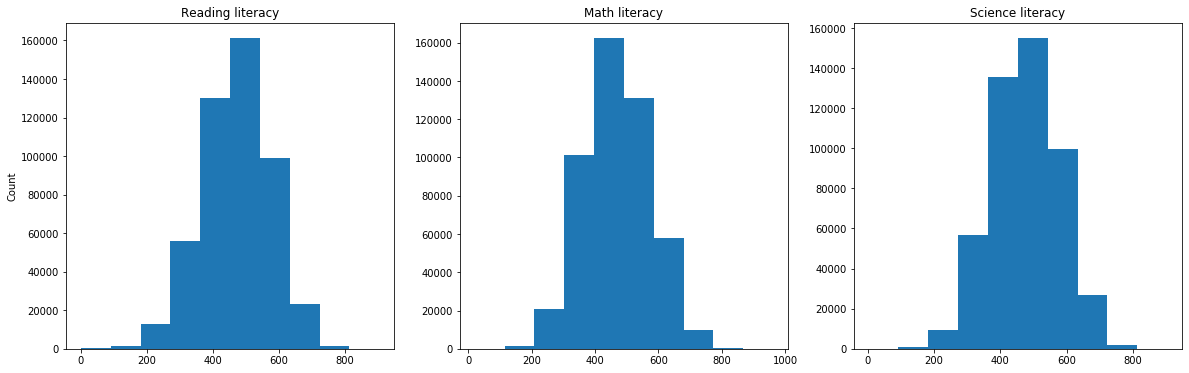

In [111]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])

# Distribution of Reading literacy
ax[0].hist(data=pisa_sub, x='PV1READ')
ax[0].set_ylabel('Count')
ax[0].set_title('Reading literacy')

# Distribution of Math literacy
ax[1].hist(data=pisa_sub, x='PV1MATH')
ax[1].set_title('Math literacy')

# Distribution of Scientific literacy
ax[2].hist(data=pisa_sub, x='PV1SCIE')
ax[2].set_title('Science literacy');

From these histograms we can see that the plausible values (scores) are normally disributed with  the mean around 500. So, I think it would be better to compute an average score from the mean of these plausible values. This will not replace these PVs in our exploration but it might help for a further analysis

In [112]:
pisa_sub['average_score'] = pisa_sub.loc[:, ['PV1READ', 'PV1MATH', 'PV1SCIE']].mean(axis=1)

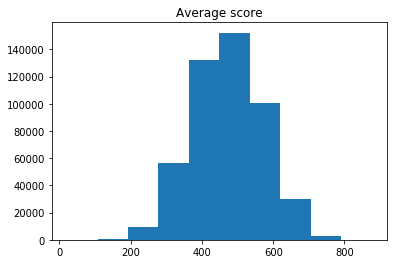

In [113]:
plt.hist(data=pisa_sub, x='average_score')
plt.title('Average score');

### Personal factors:

**AGE**:

To display this varibale, I also will divide the population into 2 segments: 15 years old students and 16 years old students.

In [114]:
# Creating a new column to segmenting the age column:
bin_edges = [pisa_sub['age'].min(), 16, pisa_sub['age'].max()+0.1]
pisa_sub['age_seg'] = pd.cut(pisa_sub['age'], bin_edges, labels=['15 years', '16 years'])

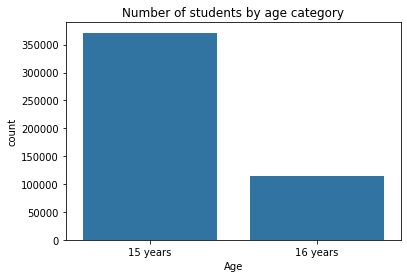

In [115]:
# Number of students by age cat:
color_base = sb.color_palette()[0]
sb.countplot(data=pisa_sub, x='age_seg', color=color_base)
plt.xlabel('Age')
plt.title('Number of students by age category');

The number of students who are 15 is three times higher than the number of students who are 16. Does a one year difference in age have any apparent effet on the final scores? That's what we are going to see in the following section. Let's now explore the other variables independently. 

**GENDER:**

What is the percentage of boys/girls in the 2012 PISA assessment? 

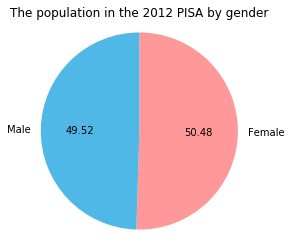

In [116]:
sorted_counts = pisa_sub['gender'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, autopct='%.2f', colors=['#FF9999', '#50b8e7'])
plt.title('The population in the 2012 PISA by gender')
plt.axis('square');

The proportion of girls is slightly higher than the proportion of boys. 

**The average study-time at school:**

This indicator is very important for our exploration. It will show us the relationship between the amount of time at school dedicated to each of the three subjects (in the PISA) and the results of the assessment. 

In the 2012 PISA, the average studty-time at school was recorded in minutes of study per week for each of the three subjects.

As a first step, let's look at the distribution shapes of these variables.

C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


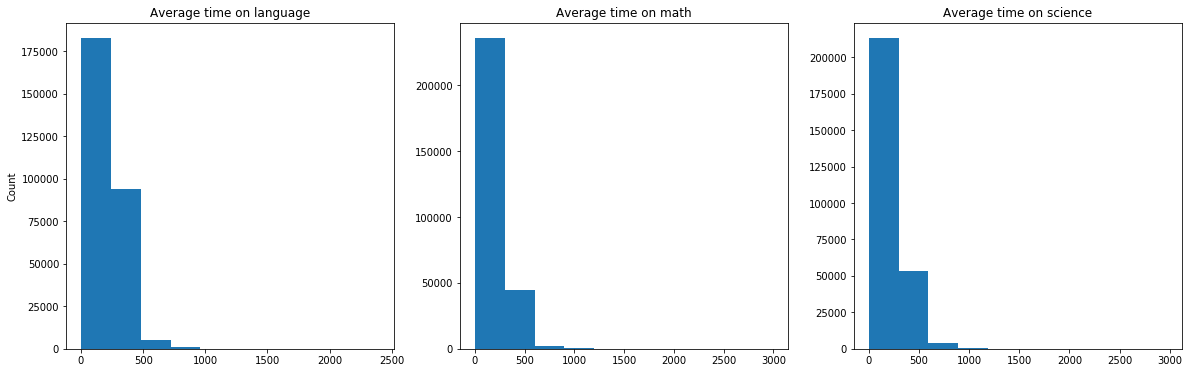

In [117]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
# Average time per week on language:
ax[0].hist(data=pisa_sub, x='min_lang_class')
ax[0].set_ylabel('Count')
ax[0].set_title('Average time on language')
# Average time per week on math:
ax[1].hist(data=pisa_sub, x='min_math_class')
ax[1].set_title('Average time on math')
# Average time per week on science:
ax[2].hist(data=pisa_sub, x='min_sci_class')
ax[2].set_title('Average time on science');

The distributions are right skewed and it seems that our three variables have some outliers.

I haven't dealt with the missing values since ploting a histogram with matplolib is column-wise and the NaN values are automatically droped, according to pandas 0.20.1 documentation (in https://pandas.pydata.org/pandas-docs/version/0.20.1/visualization.html).

I think it will be great if we can examin closely these distributions by ignoring the outliers. I will change the scales of the x axis, resize the bins and convert the xticks to hours instead of minutes.

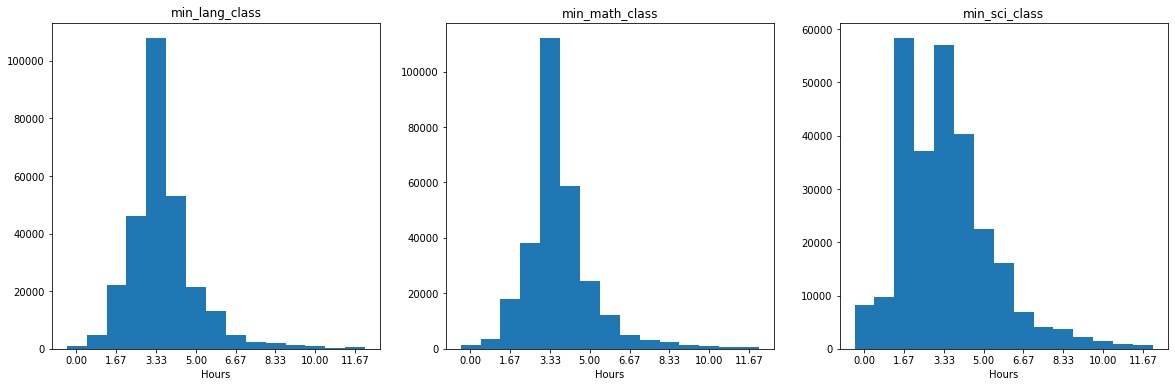

In [118]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
# Converting the minutes into hours by formatting the xticks:
import matplotlib.ticker as ticker
def func(x, pos):
     s = '{:.2f}'.format(x / 60)
     return s
mjr = ticker.FuncFormatter(func)
#Setting the bins:
bins = np.arange(0.5, 800, 50)-25
# Creating a loop to generate the histograms:
min_class = ['min_lang_class', 'min_math_class', 'min_sci_class']
i=0
for x in min_class:
    ax[i].hist(data=pisa_sub, x=x, bins=bins)
    ax[i].set_xlabel('Hours')
    ax[i].set_title(x)
    ax[i].xaxis.set_major_formatter(mjr)
    i+=1

For language and math classes, the majority of sudents spend on average approx 3.5 hours per week at school, while for science class we got two majority groups here and even the Y axis scale is different. A first group who spends on average less than 2 hours on science class per week and a second group who spends approx 4 hours on science class per week.

But what really intrigues me in these visualizations is  the lower and the upper bounds which indicate that there are some students who spend 0 hour and others who spend more than 11 hours on these subjects per week. I can't think of any country in the world who doesn't have a weekly math class for students in this age! So, either there was an error in the computation of this indicator, which is very unlikely, or either this factor has a different interpretation somehow. 

In the 2012 PISA, it is clearly said that "Learning time in test language (LMINS) was computed by multiplying the number of minutes on average in the test language class by number of test language class periods per week (ST69 and ST70). Comparable indices were computed for mathematics (MMINS) and science (SMINS)".

Well, I can't say more. I will take the numbers as they appear in this dataset. 

**GRADE:**

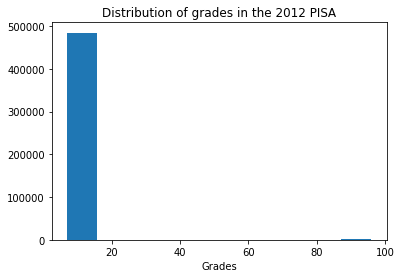

In [119]:
# Distribution of grades
plt.hist(data=pisa_sub, x='grade')
plt.xlabel('Grades')
plt.title('Distribution of grades in the 2012 PISA');

As seen earlier in the descriptive statitics, the majority of the assessed students have a grade of 10. So, it won't be very useful to consider this variable in our exploration. 

Now let's examine the external factors.

### Environmental factors:

**OECD:**

The OECD (Organization for Economic Cooperation and Development), which has 36 members, is known as the developed countries club (https://en.wikipedia.org/wiki/Developed_country).
This variable indicates whether a student's country of residence is part of this club or not. 

In [120]:
# The number of countries surveyed by PISA:
pisa_sub['Country_code'].nunique()

68

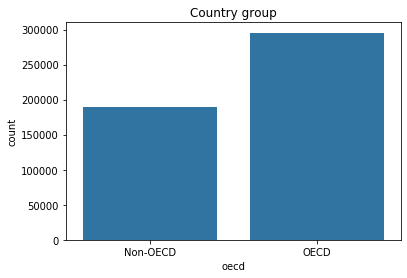

In [121]:
base_color = sb.color_palette()[0]
sb.countplot(data=pisa_sub, x='oecd', color=base_color)
plt.title('Country group');

Rather than plotting the number of students for each country, I prefered to plot them by group as it has much more meaning to the exploration of my variable of interest I think.

From the above bars, we can see that PISA has assessed more students living in oecd countries than in other group countries, knowing that the oecd has only 36 members which is just above half of countries surveyed by PISA. 

**PARENT_EDUCATION:**

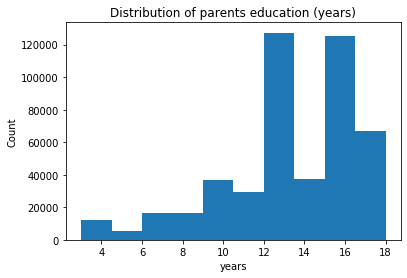

In [122]:
plt.hist(data=pisa_sub, x='parent_education')
plt.xlabel('years')
plt.ylabel('Count')
plt.title('Distribution of parents education (years)');

The histogram is left skewed with few students having low-schooled parents and more students having parents with at least a high school level (12 years of study) and above.

**ECO SOCIAL INDEX:**

As mentioned earnlier, this index consists of three components, namely home possessions, heighest parental occupation and highest parental education.

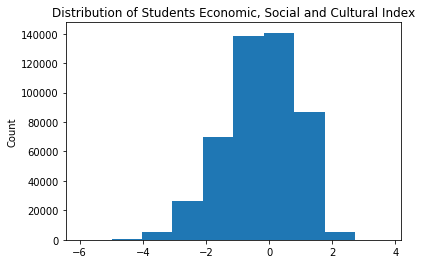

In [123]:
plt.hist(data=pisa_sub, x='eco_social_index')
plt.title('Distribution of Students Economic, Social and Cultural Index')
plt.ylabel('Count');

This shows us that most of the students assessed are in the mid-range of this index. I'd like to be more specific about this and categorize this index based on 4 levels. This will gives us a better overview about this indicator.

I will set 4 categories (very low status, low status, medium status, high status). Medium status will be ranged from 1 point 
below and above the mean (-1 < -0.19(mean) < 1). The high status is set to be the (1,4] interval. Equally on the opposite side, the low status is in the (-4,-1] interval,  and the very low status corresponds to any student below the low status range down to the min value of the index. 

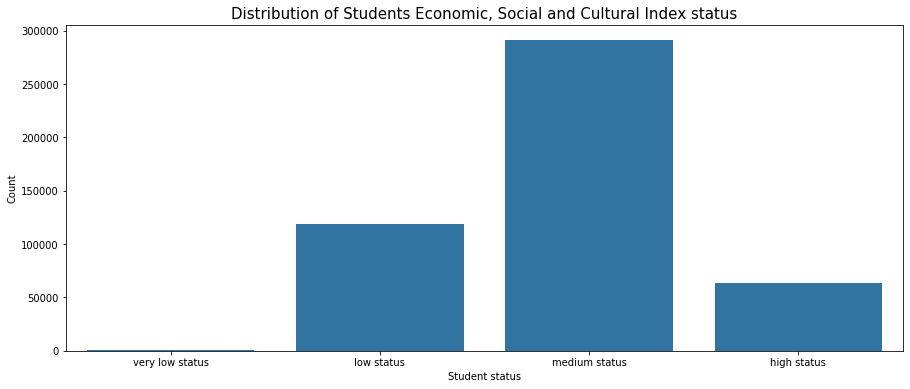

In [133]:
# Segmenting the distribution:
bin_labels =['very low status', 'low status', 'medium status', 'high status']
cut_bins = [-6, -4, -1, 1, 4] 
pisa_sub['esc_seg'] = pd.cut(pisa_sub['eco_social_index'], bins=cut_bins, labels=bin_labels, include_lowest=True)
pisa_sub['esc_seg'] = pisa_sub['esc_seg'].astype('category')

# Plotting the new distribution:
plt.figure(figsize=(15,6))
color_base = sb.color_palette()[0]
sb.countplot(data=pisa_sub, x='esc_seg', color=color_base)
plt.title('Distribution of Students Economic, Social and Cultural Index status', size=15)
plt.xlabel('Student status', size=10)
plt.ylabel('Count', size=10);

In [134]:
pisa_sub['esc_seg'].value_counts()

medium status      291057
low status         118845
high status         63429
very low status       317
Name: esc_seg, dtype: int64

From this distribution, we can see that the students around the mean value of the economic and social index are greater in number than the other students. The low status category student are the second in line followed by high status sudents. 

**Before moving forwaed, I will save this dataset with all these newly created columns in a new csv file in order to facilitate the next steps.**

In [128]:
# Saving the new dataset in a new csv file:
pisa_sub.to_csv('pisa_sub_new.csv', index=False)

In [129]:
pisa_sub_new = pd.read_csv(r'E:\NAND\project_5\pisa_sub_new.csv')
pisa_sub_new.head()

,Country_code,oecd,student_id,grade,gender,mother_job,father_job,min_lang_class,min_math_class,min_sci_class,...,outside_studytime,parent_education,teacher_relation,lang_home,PV1MATH,PV1READ,PV1SCIE,average_score,age_seg,esc_seg
0,Albania,Non-OECD,1,10,Female,Other,Part-time,NaN,NaN,NaN,...,NaN,12.0,-1.04,NaN,406.8469,249.5762,341.7009,332.708000,16 years,NaN
1,Albania,Non-OECD,2,10,Female,Full-time,Full-time,315.0,270.0,90.0,...,8.0,16.0,NaN,NaN,486.1427,406.2936,548.9929,480.476400,16 years,NaN
2,Albania,Non-OECD,3,9,Female,Full-time,Full-time,300.0,NaN,NaN,...,24.0,16.0,NaN,NaN,533.2684,401.2100,499.6643,478.047567,15 years,NaN
3,Albania,Non-OECD,4,9,Female,Full-time,Full-time,135.0,135.0,90.0,...,17.0,16.0,NaN,NaN,412.2215,547.3630,438.6796,466.088033,15 years,NaN
4,Albania,Non-OECD,5,9,Female,Part-time,Part-time,NaN,NaN,NaN,...,NaN,12.0,-0.02,NaN,381.9209,311.7707,361.5628,351.751467,15 years,NaN


## 4. Bivariate Exploration <a id='bi'></a>

**SCORES BY GENDER:**

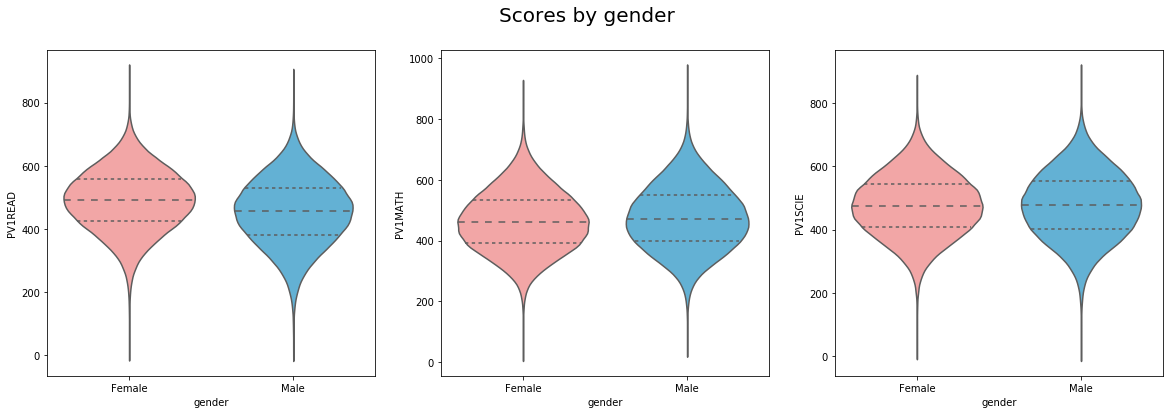

In [46]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
plt.suptitle('Scores by gender', size=20)
subj = ['PV1READ','PV1MATH', 'PV1SCIE']
i = 0
for x in subj:
    sb.violinplot(data = pisa_sub_new, x='gender', y=x, inner='quartile', ax=ax[i], palette={'Female':'#FF9999', 'Male':'#50b8e7'})
    i+=1

In reading literacy, girls are slightly better than boys, while in maths it seems that boys outdo girls. In science, they are quite comparable. 

**What about the total average score?** 

<Figure size 1080x576 with 0 Axes>

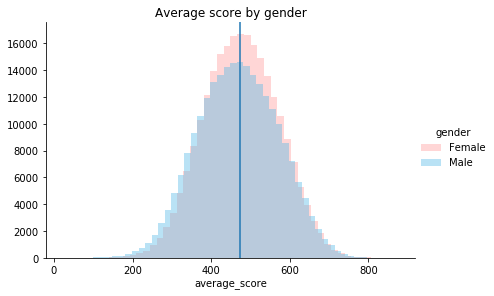

In [58]:
plt.figure(figsize=[15,8])
g = sb.FacetGrid(data=pisa_sub_new, hue='gender', palette={'Female':'#FF9999', 'Male':'#50b8e7'}, height=4, aspect=1.5)
g.map(sb.distplot, 'average_score', kde=False)
plt.title('Average score by gender')
plt.axvline(x=pisa_sub_new['average_score'].quantile(.5))
g.add_legend();

From a general perspective, it seems that boys are to a small degree better than girls.

**Let's see  how gender is distrubuted among the countries chosen for this assessment**

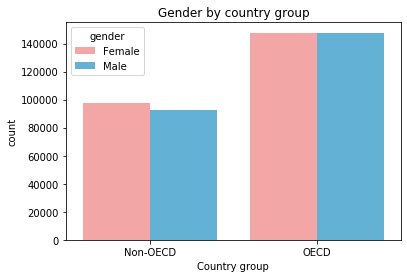

In [53]:
sb.countplot(data=pisa_sub_new, x='oecd', hue='gender', palette={'Female':'#FF9999', 'Male':'#50b8e7'})
plt.xlabel('Country group')
plt.title('Gender by country group');

OECD countries have an equal number of boys and girls, while non-oecd countries have a little more female students than male ones.

**Let's look at students performance by country group**

**SCORES BY COUNTRY GROUPS**

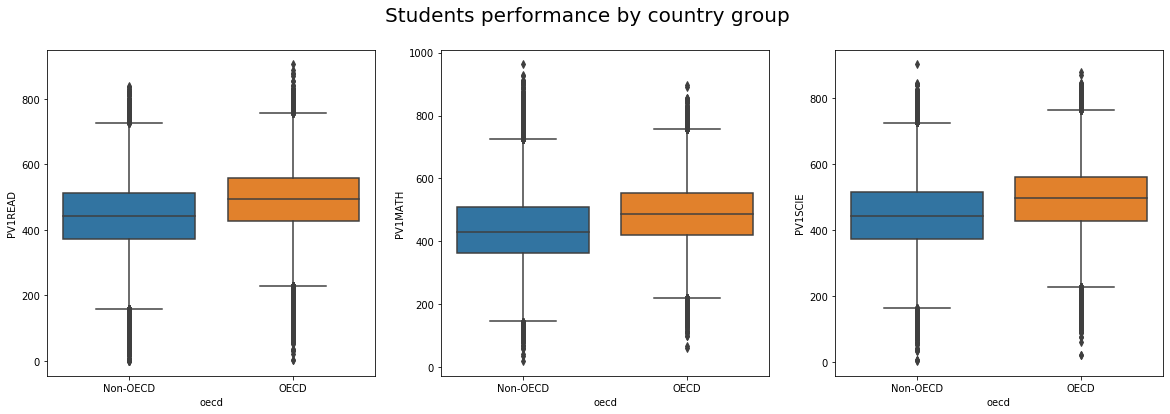

In [54]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
plt.suptitle('Students performance by country group', size=20)
subj = ['PV1READ','PV1MATH', 'PV1SCIE']
i = 0
for x in subj:
    sb.boxplot(data = pisa_sub_new, x='oecd', y=x, ax=ax[i])
    i+=1

Although the many outliers, OECD countries have obviously a higher school performance than Non-OECD countries in all three subjects.

**STUDENTS PERFORMANCE BY AGE**

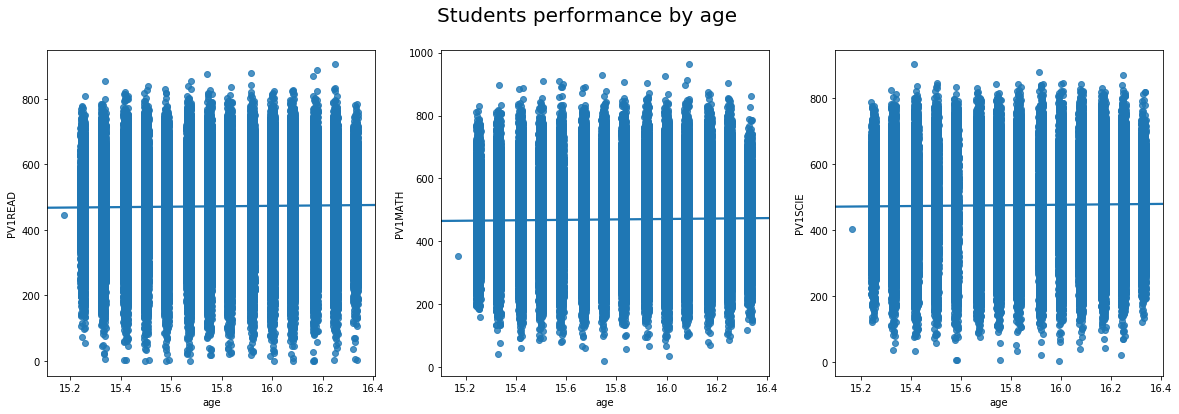

In [61]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
plt.suptitle('Students performance by age', size=20)
subj = ['PV1READ','PV1MATH', 'PV1SCIE']
i = 0
for x in subj:
    base_color = sb.color_palette()[0]
    sb.regplot(data = pisa_sub_new, x='age', y=x, ax=ax[i], x_jitter=0.01, color= base_color)
    i+=1

There is no apparent pattern and we can't draw any conclusion on this base. Yet it would be insightful if we use the age sub groups we set earlier to have a clearer view of this non significant relationship.

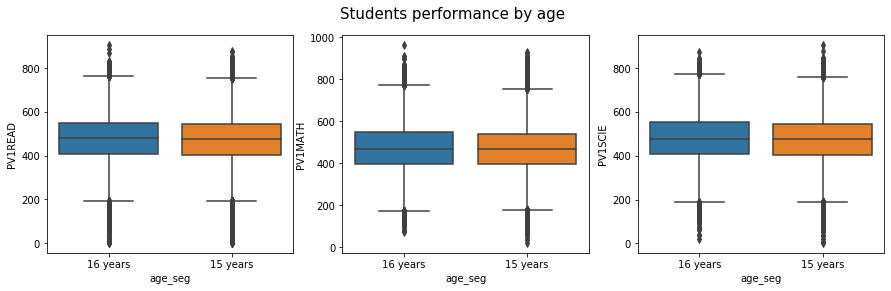

In [73]:
# By subject's PV:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[15,4])
plt.suptitle('Students performance by age', size=15)
subj = ['PV1READ','PV1MATH', 'PV1SCIE']
i = 0
for x in subj:
    sb.boxplot(data = pisa_sub_new, x='age_seg', y=x, ax=ax[i])
    i+=1

<Figure size 1080x576 with 0 Axes>

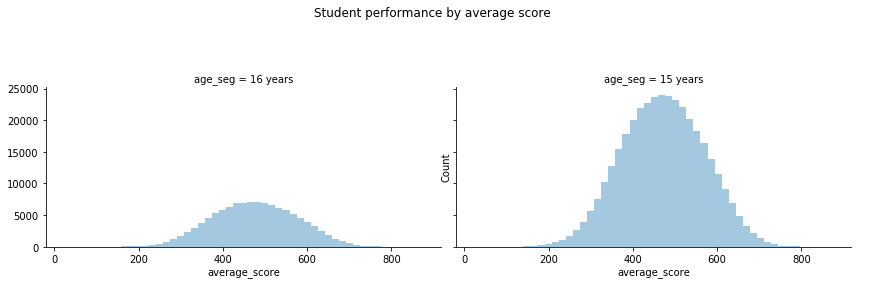

In [65]:
# By the average score:
plt.figure(figsize=[15,8])
g = sb.FacetGrid(data=pisa_sub_new, col='age_seg', height=4, aspect=1.5)
g.map(sb.distplot, 'average_score', kde=False)
plt.ylabel('Count')
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Student performance by average score')
g.add_legend();

Again, a part from the size of each age group, there is no evidence on the difference of the average score between 15 and 16 year old students. Clearly, the small difference of age is not very significant in explaining the students performance.

**What about the parental factors?**

**SCORES BY PARENT EDUCATION:**

For this relationship, I'll be taking the average score instead of the three PVs, since parents education may differ in terms of parent's orientation and the descriptive statistics of the three subjects are very similar.

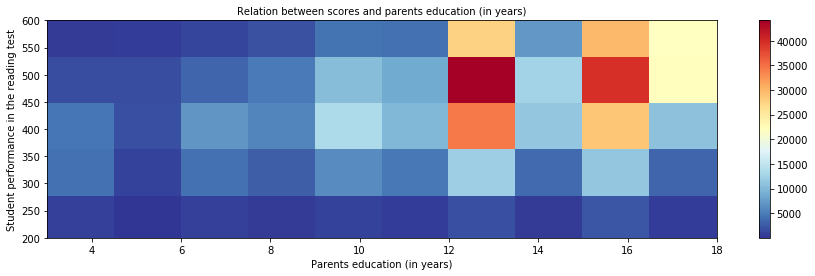

In [72]:
plt.figure(figsize=[15,4])
plt.hist2d(data=pisa_sub[pisa_sub_new['parent_education'].notna()], x='parent_education', y='average_score', cmap='RdYlBu_r', cmin=1)
plt.colorbar()
plt.ylim(200,600)
plt.title('Relation between scores and parents education (in years)', size=10)
plt.xlabel('Parents education (in years)')
plt.ylabel('Student performance in the reading test');

I transformed the y axis limits to ignore the outliers of this variable.

There is no conclusive evidence about this relationship, but we can see that many students whose parents have  12 years of education and above have performed well. 

**Now let's have a look at the relationship between parental factors and student performance from another angle, which is parents occupation. Again I'll be considering the average score.**

**SCORES BY PARENTS OCCUPATION:**

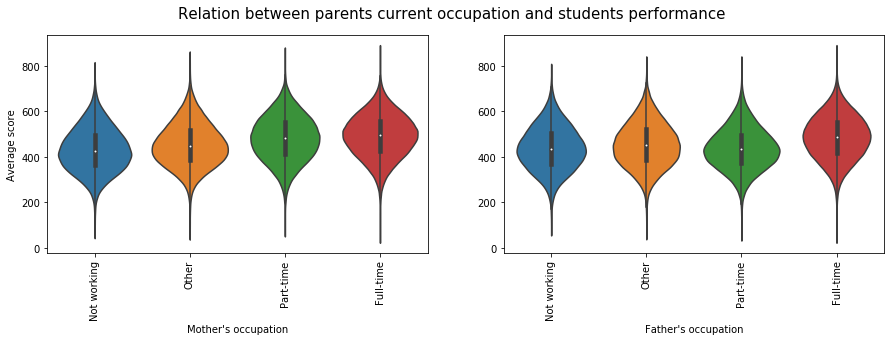

In [74]:
job_order = ['Not working', 'Other', 'Part-time', 'Full-time']

plt.figure(figsize=[15,4])
plt.suptitle('Relation between parents current occupation and students performance', size=15)

# Mother's occupation plotting:
plt.subplot(1,2,1)
sb.violinplot(data=pisa_sub_new[pisa_sub_new['mother_job'].notna()], x='mother_job', y='average_score', order=job_order)
plt.xticks(rotation='vertical')
plt.xlabel('Mother\'s occupation')
plt.ylabel('Average score')       

# Father's occupation plotting:
plt.subplot(1,2,2)
sb.violinplot(data=pisa_sub_new[pisa_sub_new['father_job'].notna()], x='father_job', y='average_score', order=job_order)
plt.xticks(rotation='vertical')
plt.xlabel('Father\'s occupation')
plt.ylabel('');

It seems that mother's current occupation satatus has, to a certain extent, an effect on the average score of students. More students whose mothers work full-time do better than the ones whose mothers have a different occupation status. Interestignly, students with unemployed mothers are the less performers. 

As for the father occupation status, except for full-timers, all the other status are quite similar. Evidently, a full-time status is synonym of a somewhat financial statibility, which is likely to affect the performance of children. 

**Let's dive a little deeper into this by exploring a quantitative measure of parent's occupation in our dataset. the 'parent_status' variable in our dataset is the highest occupational status of parents (HISEI) which corresponds to the higher international socio-economic index of occupational status of either parent.**

**SCORES BY HIHEST OCCUPATIONAL STATUS OF PARENTS:**

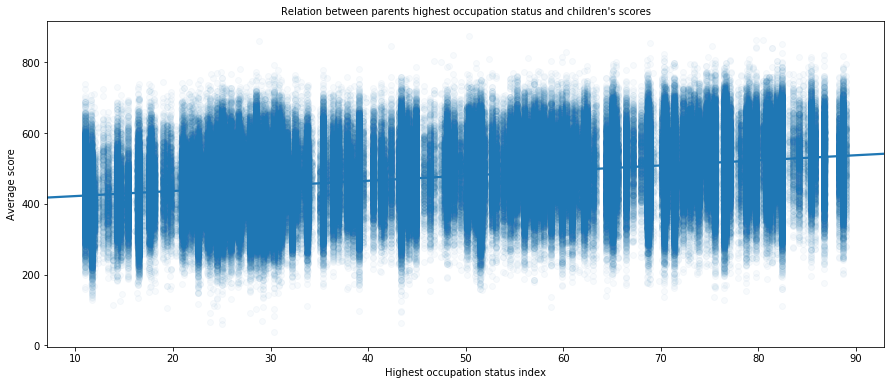

In [77]:
plt.figure(figsize=[15,6])

sb.regplot(data=pisa_sub_new[pisa_sub_new['parent_status'].notna()], x='parent_status', y='average_score', scatter_kws={'alpha':0.03})
plt.title('Relation between parents highest occupation status and children\'s scores', size=10)
plt.xlabel('Highest occupation status index')
plt.ylabel('Average score');

There is a small upward trend. Children's performance in reading improves, but slowly, as the highest parent's occupation index increases. 

**Now let's see how this performance imporves with the amount of time spent studying**

**SCORES BY AVERAGE TIME AT SCHOOL:**

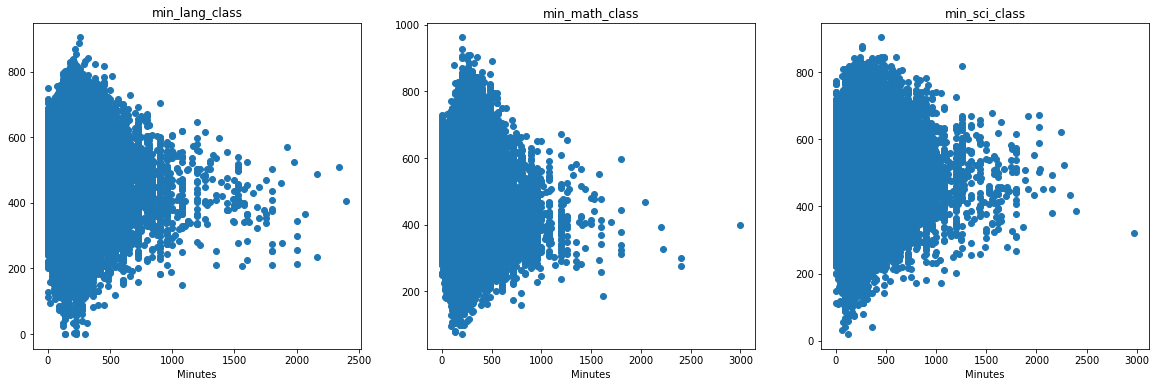

In [78]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])


min_class = ['min_lang_class', 'min_math_class', 'min_sci_class']
subject = ['PV1READ', 'PV1MATH', 'PV1SCIE']
i=0
for x,y in zip(min_class, subject):
    ax[i].scatter(data=pisa_sub_new, x=x, y=y)
    ax[i].set_xlabel('Minutes')
    ax[i].set_title(x)
    i+=1

This is a little bit messy. we have overlapping points here due to the skewness of the data and we can't seen any pattern. So, one way is to add some transparency and re-scale the x axis. I think taking a sample is also a very good idea to take a closer look at the underlying patterns.

As for the average time per week, I think it's better to select only the values greater or equal to 60 which corresponds to a minimum of 1 hour per week.  

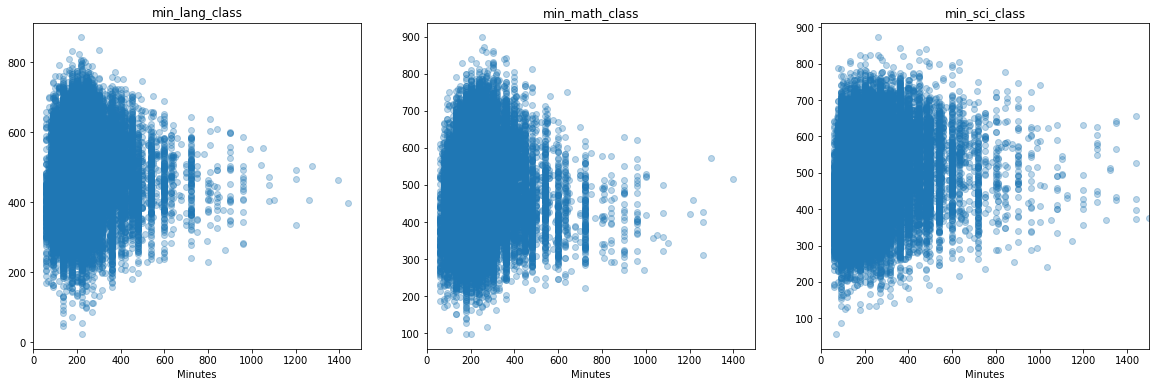

In [79]:
data = pisa_sub_new[(pisa_sub_new['min_lang_class'] >= 60) & (pisa_sub_new['min_math_class'] >= 60) & (pisa_sub_new['min_sci_class'] >= 60) ]

fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])

min_class = ['min_lang_class', 'min_math_class', 'min_sci_class']
subject = ['PV1READ', 'PV1MATH', 'PV1SCIE']
i=0
for x,y in zip(min_class, subject):
    ax[i].scatter(data=data.sample(frac=.2), x=x, y=y, alpha=0.3)
    ax[i].set_xlabel('Minutes')
    ax[i].set_xlim(0,1500)
    ax[i].set_title(x)
    i+=1

From the above scatter plots, we can see that there is no correlation between the average time per week (at school) and the overall scores of the 3 subjects. The great majority of best performers and less performers are in the range of 200 to 400 minutes (3 to 6 hours) per week.

**Now, let's move another school related variables which are teacher support and student-teacher relation**

**SCORES BY TEACHER SUPPORT AND STUDENT/TEACHER RELATION:** 

Befor exploring the relationship between teacher support index and the sutudent perfomance, let's see how this support changes between our different country groups.

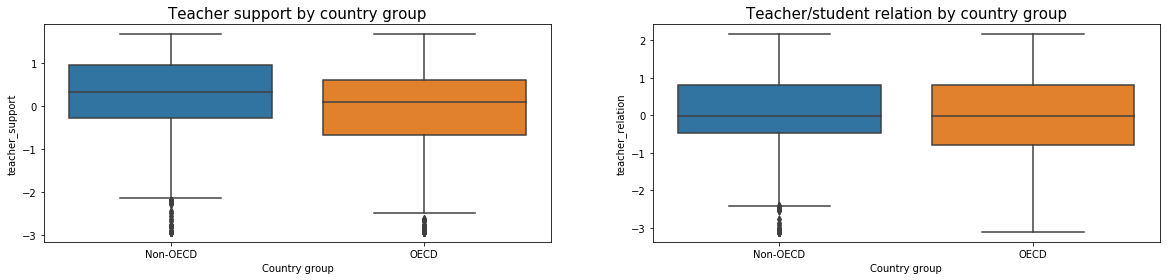

In [80]:
plt.figure(figsize=[20,4])

# Teacher support by country group:
plt.subplot(1,2,1)
sb.boxplot(data=pisa_sub_new, x='oecd', y='teacher_support')
plt.title('Teacher support by country group', size=15)
plt.xlabel('Country group');

# Teacher/Student relation by country group:

plt.subplot(1,2,2)
sb.boxplot(data=pisa_sub_new, x='oecd', y='teacher_relation')
plt.title('Teacher/student relation by country group', size=15)
plt.xlabel('Country group');

Surprisingly, teacher support and teacher/student relations in non-oecd countries are greater than in oecd countries. And yet we saw earlier that oecd students perform more than the ones living in non-oecd countries. This may imply that teacher support and teacher/student relation have no, or little, effet on students socres.

**Let's take a look at the relationship with teacher support.**

Since teacher support is an index computed on the base of qualitative variables, and since this index doesn't concern a particular subject but rather it is a general indicator, I think it is better to compare it to an overall score of the three variables.

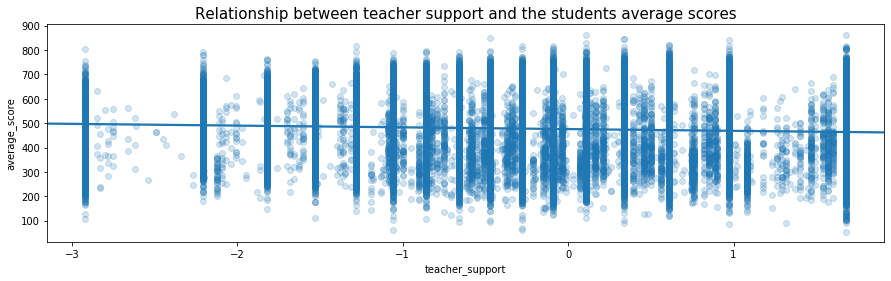

In [89]:
#Plotting the relationship:
plt.figure(figsize=([15,4]))
sb.regplot(data=pisa_sub_new, x='teacher_support', y='average_score', scatter_kws={'alpha':1/5})
plt.title('Relationship between teacher support and the students average scores', size=15);

As expected, teacher support doesn't seem to be correlated with the oeverall score.

**Before concluding this section, let's see the different correlations between the numeric variables already seen.**

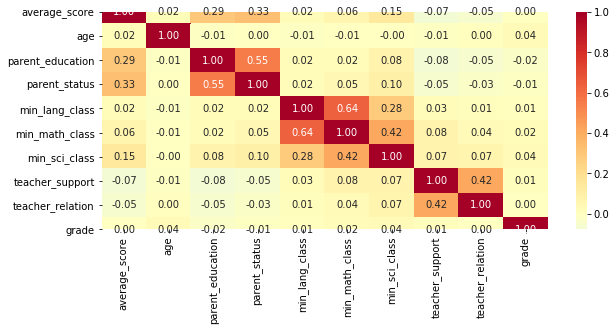

In [90]:
plt.figure(figsize = [10, 4])
sb.heatmap(data=pisa_sub_new[['average_score','age', 'parent_education','parent_status', 'min_lang_class', 'min_math_class', 'min_sci_class', 'teacher_support', 'teacher_relation', 'grade']].corr(), center=0, cmap="RdYlBu_r",annot=True, fmt='.2f')
plt.show();

**We don't have strong correlations  between the variables. The variable having the highest correlation with our variable of interest is parent_status, which is by the way very weak if considered independently.**

**Perhaps, the categorical variables in our datasets are better in giving some insights into the scores obtained in the 2012 PISA.**

**As we saw from the bivariate exploration:**
**- The difference in performance of students based on their gender is seen in reading and math literacy but it is very small**
**- The performance of students is different among the country groups (oecd and non-oecd)**
**- Students with full-time parents tend to perform well in this assessment**
**- More students with parents with a high-school level (12 years) or above have a better score than other students with parents of a lesser level.**

## 5. Multivariate Exploration<a id='mu'></a>

Now that I have explored the interaction between the student performance and a set of quantitative and qualitative variables, it's time to dive a little bit deeper into these relationships through a multivariate explorations.

**SCORES BY GENDER IN COUNTRY GROUPS:**

If the performance in country groups differ, let's see how this performance changes by gender among these groups and between them.

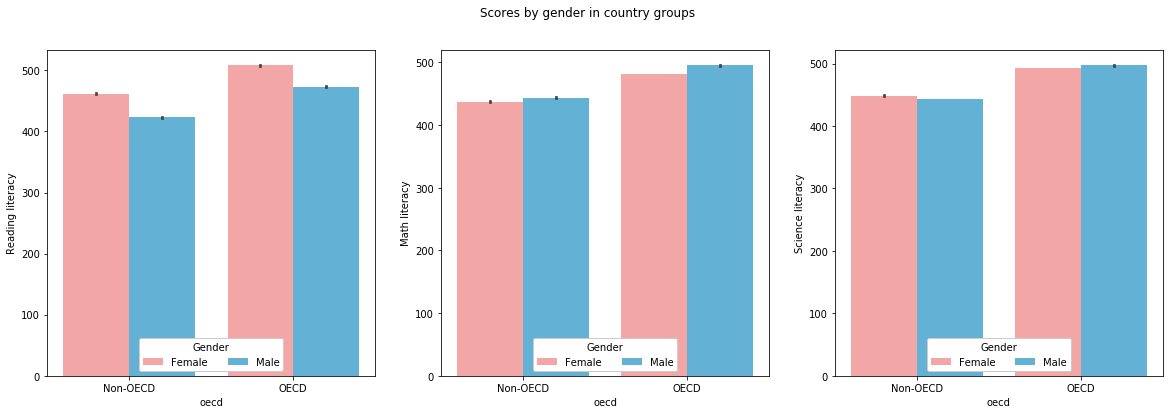

In [84]:
fig, ax= plt.subplots(nrows=1,ncols=3,figsize=[20,6])
plt.suptitle('Scores by gender in country groups')
score_var= ['PV1READ', 'PV1MATH', 'PV1SCIE']
label = ['Reading literacy', 'Math literacy', 'Science literacy']
i=0
for y, z in zip(score_var, label):
    sb.barplot(data=pisa_sub_new, x='oecd', y=y, hue='gender', ax=ax[i], palette={'Female': '#FF9999', 'Male':'#50b8e7'})
    ax[i].legend(loc=8, ncol=3, framealpha=1, title='Gender')
    ax[i].set_ylabel(z)
    i+=1

This doesn't not change from what we already saw. Female students in oecd countries and non oecd countries perform well in reading as compared to boys, while in maths it is the opposite. As between the 2 groups, both boys and girls from OECD outdo their Non-OECD mates. In science literacy, the 2 groups have a small diffrence by gender. In Non-OECD countries, girls are better than boys, while in OECD countries it's the boys who performs a bit better than girls.

**Now let's see how these differences in math and reading change among top performers countries and less performers countries**

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<Figure size 1440x1080 with 0 Axes>

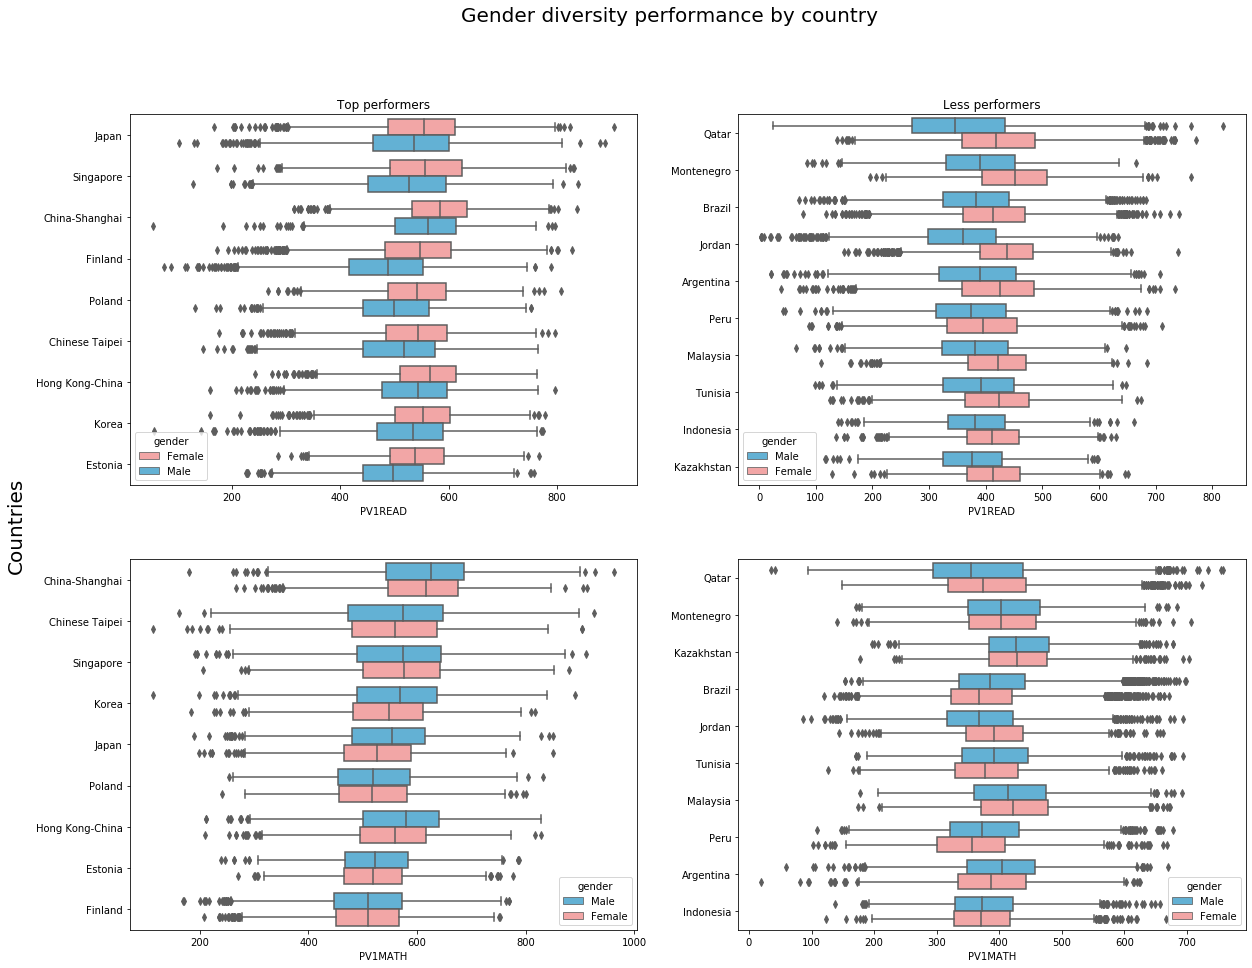

In [86]:
# Grouping and ordering countries by the score average of both reading and math:
df = pisa_sub_new.groupby(['Country_code', 'gender'], as_index=False)['PV1READ', 'PV1MATH'].mean()

# Selecting among these countries some of the best performers and less performers:
largest = df.nlargest(10, ['PV1READ', 'PV1MATH'])['Country_code'].values
smallest = df.nsmallest(10, ['PV1READ', 'PV1MATH'])['Country_code'].values
data1 = pisa_sub_new.loc[pisa_sub_new['Country_code'].isin(largest) | pisa_sub_new['Country_code'].isin(smallest)]

# Creating a column categorizing this group of countries
data1['performance'] = ['Top performers' if x in largest else 'Less performers' for x in data1['Country_code']]

# Plotting:
plt.figure(figsize=[20, 15])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle('Gender diversity performance by country', size=20)
fig.text(0.04, 0.5, 'Countries', va='center', rotation='vertical', fontsize=20)
sb.boxplot(data=data1.sort_values(by=['PV1READ'], ascending=False).query('performance == "Top performers"'), x='PV1READ', y='Country_code', hue='gender', palette={'Female': '#FF9999', 'Male':'#50b8e7'}, ax=ax[0,0])
ax[0,0].set_title('Top performers')
ax[0,0].set_ylabel('')
sb.boxplot(data=data1.sort_values(by=['PV1READ'], ascending=False).query('performance == "Less performers"'), x='PV1READ', y='Country_code', hue='gender', palette={'Female': '#FF9999', 'Male':'#50b8e7'}, ax=ax[0,1])
ax[0,1].set_ylabel('')
ax[0,1].set_title('Less performers')
sb.boxplot(data=data1.sort_values(by=['PV1MATH'], ascending=False).query('performance == "Top performers"'), x='PV1MATH', y='Country_code', hue='gender', palette={'Female': '#FF9999', 'Male':'#50b8e7'}, ax=ax[1,0])
ax[1,0].set_ylabel('')
sb.boxplot(data=data1.sort_values(by=['PV1MATH'], ascending=False).query('performance == "Less performers"'), x='PV1MATH', y='Country_code', hue='gender', palette={'Female': '#FF9999', 'Male':'#50b8e7'}, ax=ax[1,1])
ax[1,1].set_ylabel('');

In reading:<br>
- Female students in the top performers and the less performs surpass male students. The difference is however greater in less performers countries. It is somewhat apparent  in some top performers countries like Singapore, Finland and Estonia.

In maths: <br>
- Boys outdo girls in all countries except qatar, jordan and Malaysia. However, the difference is  very small except for maybe Hong-Kong and Argentina.

**Let's have a look at another variable involving country groups.**

**SCORES BY PARENTS OCCUPATION AMONG COUNTRY GROUPS:**

<Figure size 1080x720 with 0 Axes>

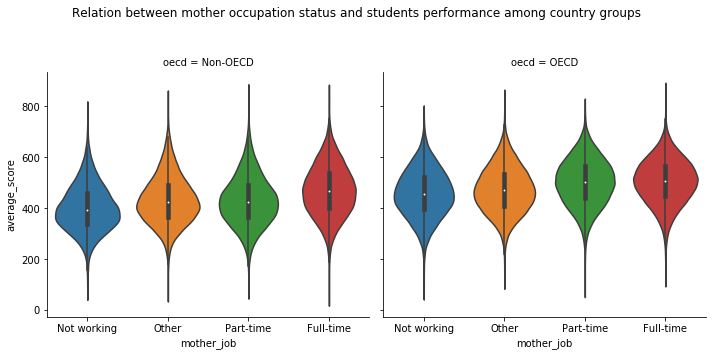

In [91]:
# Mother occupation status and students performance among country groups:
job_order = ['Not working', 'Other', 'Part-time', 'Full-time']

plt.figure(figsize=[15,10])
g=sb.catplot(data=pisa_sub_new, x='mother_job', y='average_score', col='oecd', kind='violin',order=job_order)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relation between mother occupation status and students performance among country groups');

While the scores are generally better in OECD countries for all mothers occupations, the difference between each working category in both country groups is quite similar. Students with full time working mothers score better in comparison to other students with other different mother occupations. 

<Figure size 1080x720 with 0 Axes>

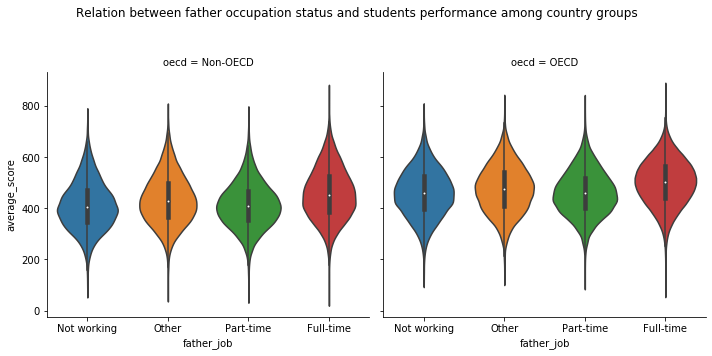

In [92]:
# Fother occupation status and students performance among country groups:
job_order = ['Not working', 'Other', 'Part-time', 'Full-time']

plt.figure(figsize=[15,10])
g=sb.catplot(data=pisa_sub, x='father_job', y='average_score', col='oecd', kind='violin',order=job_order)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relation between father occupation status and students performance among country groups');

The difference between students having full-time working fatherd and other students is more visible in OECD countries than in Non-OECD countries.

**Let's see if these scores change across parents working-status from the perspective of outside-of-school study hours**. Normally, full-time parents have less time to assist children outside of school. But on the other hand, financial stability is far more important and parents not working (or looking for a job) have also less time to assist their children outside of school, since they might be busy looking for a job or freelancing. In no way, I am infering that working status have any relation with outside-of-school study hours, but it would be great to explore this relationship.

I will return again to gender to make a nuance, more plausible than country groups since outside-of-school study hours are related to individuals rather than countries.

**SCORES BY OUSIDE-OF-SCHOOL STUDY HOURS CONSIDERING PARENTS STATUS:**

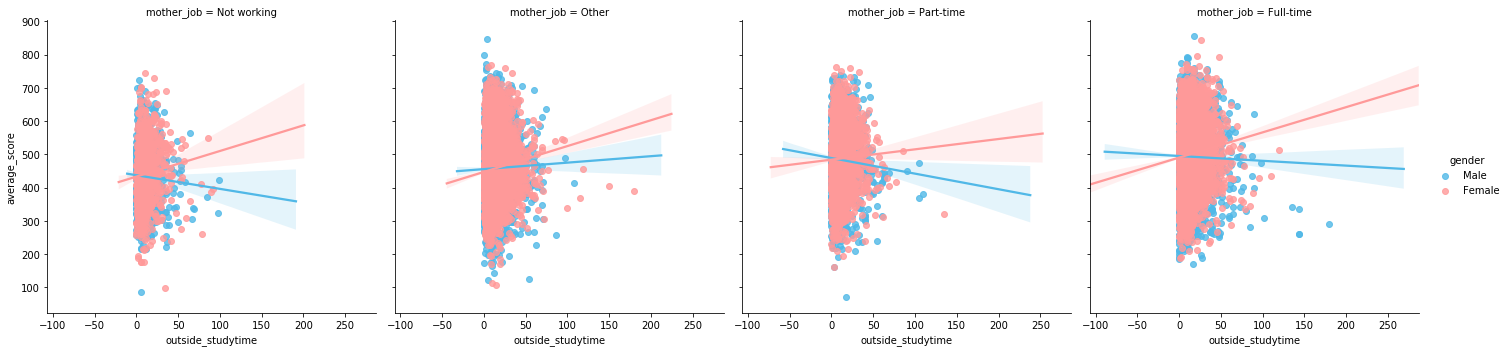

In [138]:
# Mother occupation:
job_order = ['Not working', 'Other', 'Part-time', 'Full-time']
sb.lmplot(data=pisa_sub_new.sample(frac=0.1), x='outside_studytime', y='average_score', col='mother_job', hue='gender', col_order= job_order, palette={'Female': '#FF9999', 'Male':'#50b8e7'}, legend=True)

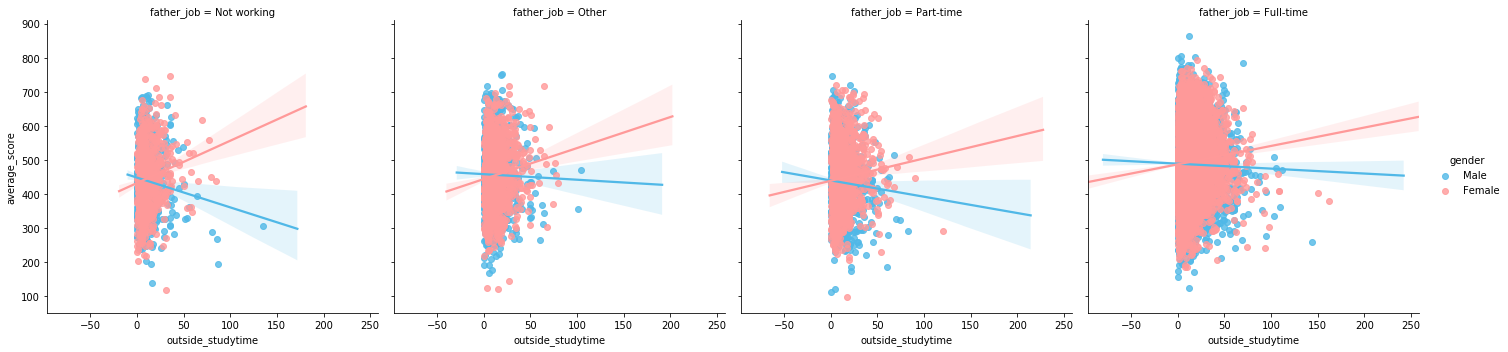

In [140]:
# Father occupation: 
job_order = ['Not working', 'Other', 'Part-time', 'Full-time']
sb.lmplot(data=pisa_sub_new.sample(frac=0.1), x='outside_studytime', y='average_score', col='father_job', hue='gender', col_order= job_order, palette={'Female': '#FF9999', 'Male':'#50b8e7'}, legend=True)

I took a sample of population (10%) and n all job status for both parents, the relation between the average score and the time spent on studying outside of school is the same.

What about the average time spent at school, but this time among our different group countries

It's time to conclude our multivariate exploration with a final graph. 

**SCORES BY ECONOMIC AND SOCIAL STATUS AMONG COUNTRY GROUPS:**

<Figure size 1080x720 with 0 Axes>

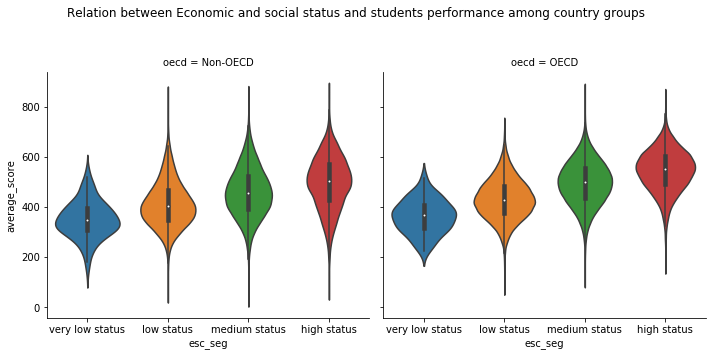

In [137]:
cat_dtype = pd.api.types.CategoricalDtype(
    categories=['very low status', 'low status', 'medium status', 'high status'], ordered=True)
pisa_sub_new['esc_seg'].astype(cat_dtype)

order = ['very low status', 'low status', 'medium status', 'high status']

plt.figure(figsize=[20,10])
g=sb.catplot(data=pisa_sub_new, x='esc_seg', y='average_score', col='oecd', kind='violin', order=order)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relation between Economic and social status and students performance among country groups');

Clearly, as long as the economic and social status are higher as long as the scores are better in both country groups, except that the different between status and scores is more visible in OECD countries.